Learning T-Sne

In [22]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
d=pd.read_csv('train.csv')
d.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
l=d['label']

In [24]:
newd=d.drop('label',axis=1)

In [25]:
newd.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
labels=l.head(15000)
data=newd.head(15000)

In [27]:
type(data)

pandas.core.frame.DataFrame

In [28]:
#data standardization
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)


In [90]:
from sklearn.manifold import TSNE
data_1000=standardized_data[0:5000,:]
labels_1000=labels[0:5000]

In [91]:
model=TSNE(n_components=2,random_state=0, perplexity=30,n_iter=5000) #random state should be 0 to want sample output if runned for
#default perp=30, iteration=1000
tsne_data=model.fit_transform(data_1000)

In [92]:
tsne_data = np.vstack((tsne_data.T, labels_1000)).T

# Ploting the result of tsne


In [93]:
tsne_data.shape

(5000, 3)

In [94]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

In [95]:
tsne_df.shape

(5000, 3)

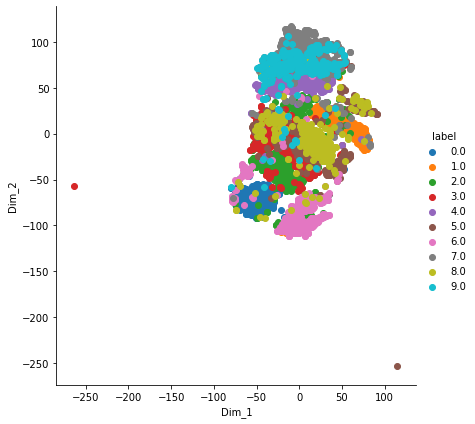

In [96]:
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()
